In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

In [8]:
df = pd.read_csv(r'C:\Users\vinee\CodingBlocks\Pandas\mnist_train.csv')

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(42000, 785)

- Label column tells the number on the image and other 784 rows are the pixel values of the image
- Image is 28*28 = 784 rows, (as the image is black and white therefore only 1 channel)

In [56]:
# It's easier to work with numpy arrays therefore we will work with them
array = df.values #gives numpy array
np.random.shuffle(array) #reason explained below
print(array)

[[7 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [57]:
X = array[:,1:]
Y = array[:,0]
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [58]:
def drawImage(X,Y,i):
    plt.imshow(X[i].reshape(28,28))
    plt.show()

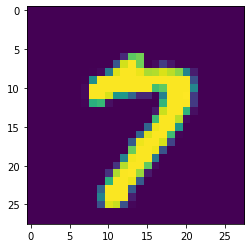

In [59]:
drawImage(X,Y,0)

In [60]:
#Matplotlib doesnot know that this is balck imagetherfore it will random assign colors, use cmap='gray'
def drawImage(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.title('Label ' + str(Y[i]))
    plt.show()

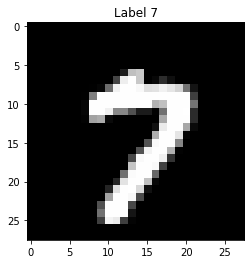

In [61]:
for i in range(1):
    drawImage(X,Y,i)

In [62]:
#Split the data for training and test
split = int(0.80*X.shape[0])

X_train,Y_train = X[:split,:split],Y[:split]

X_test,Y_test = X[split:,:],Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


#### But if we got numbers from 0-8 in our training dataset and 9,10 in test..that would be a problem..therefore we need to randomize our data 

In [54]:
A = np.array([1,2,3,4,5])
np.random.shuffle(A)
print(A)

[5 2 4 1 3]


In [55]:
#shuffle 2d array
B = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

np.random.shuffle(B)
print(B)

[[7 8 9]
 [1 2 3]
 [4 5 6]]


In our case we only want to shuffle the row values and not columns,and we are getting exactly like this, but we can't shuffle X_train and Y_train separately as Y labels are mapped to pixel values therfore do this before splitting

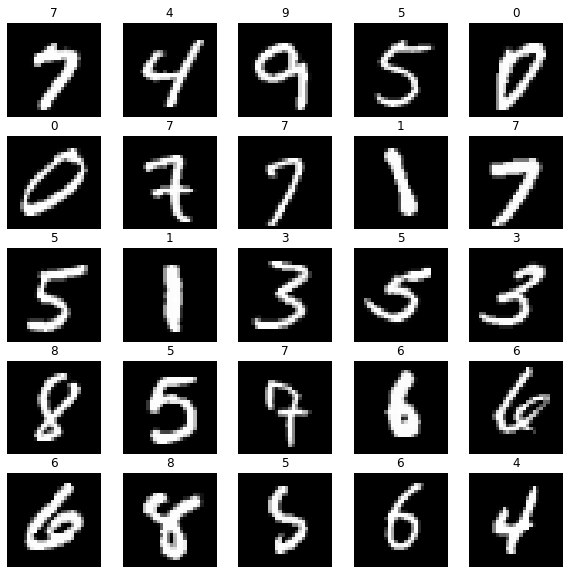

In [70]:
#draw a grid of 25 images (5*5)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.title(Y[i])

In [92]:
#If don't want to manually split our data use sklearn
from sklearn.model_selection import train_test_split

In [93]:
#train size will be 80%
#if we want to split always in the same order use random_state(like seed value)
XT,Xt,YT,Yt = train_test_split(X,Y,test_size=0.2,random_state=7)

In [94]:
print(XT.shape,YT.shape)
print(Xt.shape,Yt.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [ ]:
#timepass

In [91]:
print(X[0].reshape(28,28)[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [82]:
c = X[0].reshape(28,28)

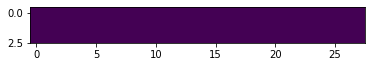

In [90]:
plt.imshow(c[:3,:])